Getting Started with Image Processing with Python.

Introduction to Python Imaging Library(PIL)

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()



Saving Lenna_(test_image).png to Lenna_(test_image).png


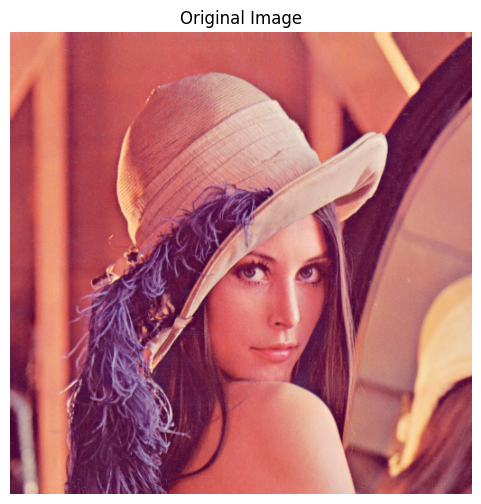

In [4]:
image_path = "Lenna_(test_image).png"
image = Image.open(image_path)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


Task2: Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

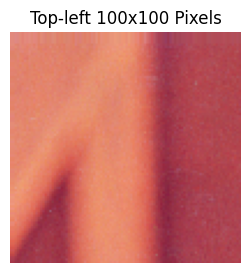

In [ ]:
image_array = np.array(image)
top_left = image_array[:100, :100]

plt.figure(figsize=(3, 3))
plt.imshow(top_left)
plt.title("Top-left 100x100 Pixels")
plt.axis("off")
plt.show()

Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

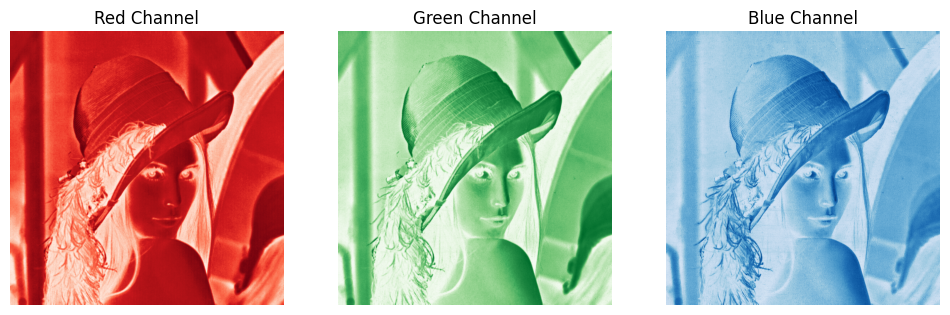

In [ ]:
r_channel = image_array[:, :, 0]  # Red channel
g_channel = image_array[:, :, 1]  # Green channel
b_channel = image_array[:, :, 2]  # Blue channel

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(r_channel, cmap="Reds")
ax[0].set_title("Red Channel")
ax[0].axis("off")

ax[1].imshow(g_channel, cmap="Greens")
ax[1].set_title("Green Channel")
ax[1].axis("off")

ax[2].imshow(b_channel, cmap="Blues")
ax[2].set_title("Blue Channel")
ax[2].axis("off")

plt.show()


Task4: Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

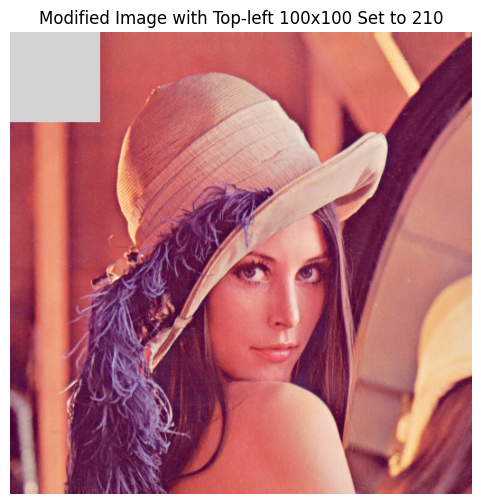

In [ ]:
modified_image = image_array.copy()
modified_image[:100, :100] = 210

plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image with Top-left 100x100 Set to 210")
plt.axis("off")
plt.show()


Exercise 2

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

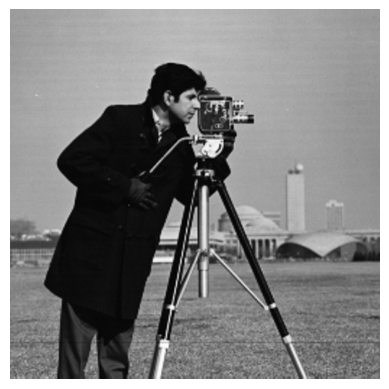

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "cameraman.png"
image = Image.open(image_path).convert("L")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

Text(0.5, 1.0, 'Cropped Section')

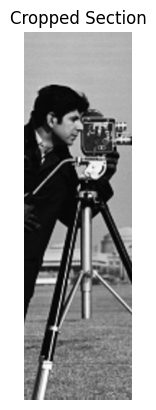

In [ ]:
image_array = np.array(image)
height, width = image_array.shape
start_x = width // 2 - 75
end_x = width // 2 + 75
cropped_image = image_array[:, start_x:end_x]

plt.subplot(1, 4, 2)
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.title("Cropped Section")

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

Display the resulting binary image.

Text(0.5, 1.0, 'Threshold Image')

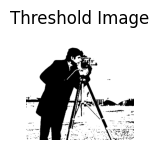

In [ ]:
threshold_value = 100
binary_image = np.where(image_array < threshold_value, 0, 255).astype(np.uint8)

plt.subplot(1, 4, 3)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Threshold Image")

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.

• Display the rotated image using matplotlib.

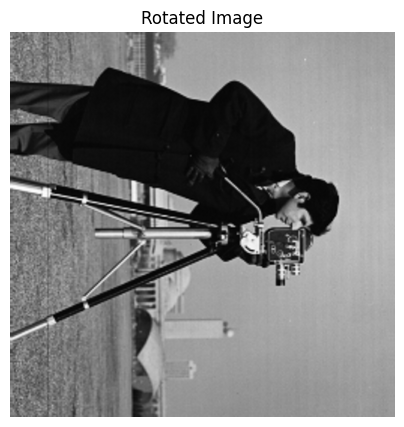

In [ ]:
rotated_image = np.rot90(image_array, k=-1)

plt.figure(figsize=(5, 5))
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated Image")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

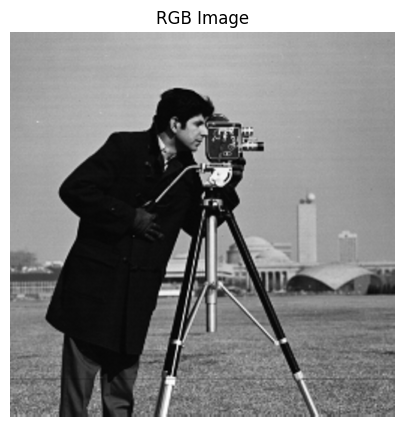

In [ ]:
rgb_image = np.stack([image_array]*3, axis=-1)

plt.figure(figsize=(5, 5))
plt.imshow(rgb_image)
plt.axis("off")
plt.title("RGB Image")
plt.show()

3 Image Compression and Decompression using PCA.

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

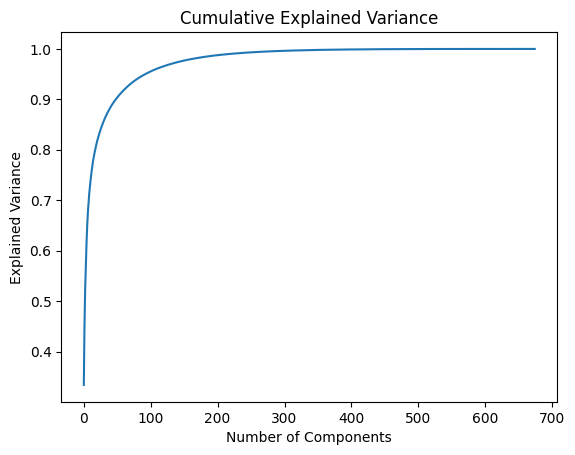

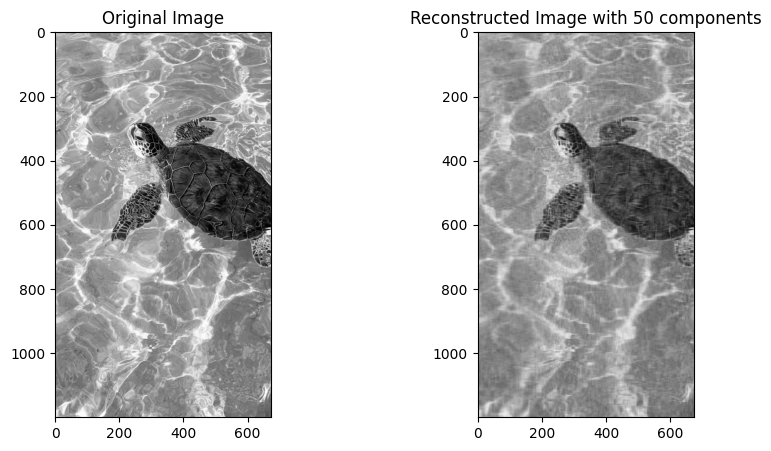

MSE: 0.0032117549491379
PSNR: 24.932575979814878 dB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import color, io

img = io.imread('trutle.jpg')
gray_img = color.rgb2gray(img)
img_vector = gray_img.flatten()
mean_img = np.mean(gray_img, axis=0)
centered_img = gray_img - mean_img

cov_matrix = np.cov(centered_img.T)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

plt.figure()
plt.plot(cumulative_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


k = 50
top_k_eigenvectors = eigenvectors[:, :k]


compressed_data = np.dot(centered_img, top_k_eigenvectors)
reconstructed_img = np.dot(compressed_data, top_k_eigenvectors.T) + mean_img


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title(f'Reconstructed Image with {k} components')

plt.show()


mse = np.mean((gray_img - reconstructed_img) ** 2)
psnr = 20 * np.log10(1.0 / np.sqrt(mse))
print(f'MSE: {mse}')
print(f'PSNR: {psnr} dB')